In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import CM4Xutils
CM4Xutils.__version__

'0.4.1'

In [3]:
import warnings
import dask
import xarray as xr
import xwmt
import xgcm
import matplotlib.pyplot as plt
import numpy as np
import cftime

import doralite
import gfdl_utils.core as gu

In [4]:
grid_og = CM4Xutils.load_wmt_grid(
    "CM4Xp25",
    interval=str(2000),
    dmget=True
)

Loading CM4Xp25-piControl for interval `2000`.
Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Loading CM4Xp25-historical for interval `2000`.
Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp25 grid coordinates from supergrid.
Regridding ice
Inferring Z grid coordinate: depth `z_`


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [5]:
ds = grid_og._ds.isel(time=0).drop_dims("time_bounds")
ds = ds.drop_vars([v for v in ds.data_vars if v not in ["umo", "vmo", "sigma2", "thkcello", "dynamics_h_tendency"]]).fillna(0.)

In [6]:
coords={
    'X': {'center': 'xh',  'outer': 'xq'},
    'Y': {'center': 'yh',  'outer': 'yq'},
    'Z': {'center': 'z_l', 'outer': 'z_i'},
}
metrics = {
    ('X', 'Y'): ['areacello']
}
grid = xgcm.Grid(
    ds,
    coords=coords,
    metrics=metrics,
    boundary={"X":"periodic", "Y":"extend", "Z":"extend"},
    autoparse_metadata=False
)

In [7]:
ds_coarse = CM4Xutils.coarsen.horizontally_coarsen(grid._ds, grid, {"X":6, "Y":6})
ds_coarse = ds_coarse.assign_coords({"z_i":ds.z_i})

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xarray/core/rolling.py:1122: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explicitly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  reduced = self.obj.variable.coarsen(
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xarray/core/rolling.py:1122: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set

Skipping variable sigma2 because `cell_methods` attribute not defined.


In [8]:
coords={
    'X': {'center': 'xh',  'outer': 'xq'},
    'Y': {'center': 'yh',  'outer': 'yq'},
    'Z': {'center': 'z_l', 'outer': 'z_i'},
}
metrics = {
    ('X', 'Y'): ['areacello']
}
grid_coarse = xgcm.Grid(
    ds_coarse,
    coords=coords,
    metrics=metrics,
    boundary={"X":"periodic", "Y":"extend", "Z":"extend"},
    autoparse_metadata=False
)

In [9]:
conv_umo = -(
    grid.diff(ds.umo.fillna(0.), "X") +
    grid.diff(ds.vmo.fillna(0.), "Y")
)

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [10]:
conv_umo_coarse = -(
    grid_coarse.diff(ds_coarse.umo.fillna(0.), "X") +
    grid_coarse.diff(ds_coarse.vmo.fillna(0.), "Y")
)

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


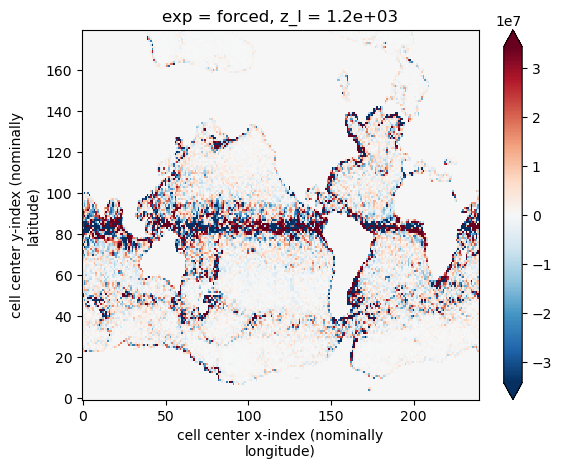

In [11]:
conv_umo_coarse.isel(z_l=20, exp=0).plot(robust=True)

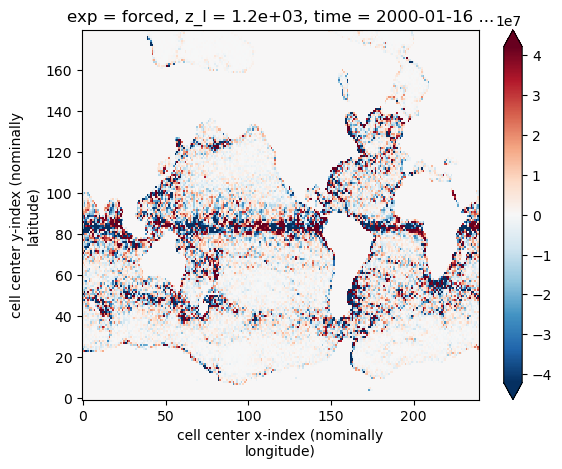

In [12]:
(ds_coarse.dynamics_h_tendency.fillna(0.)*ds_coarse.areacello*1035).isel(z_l=20, exp=0).plot(robust=True)

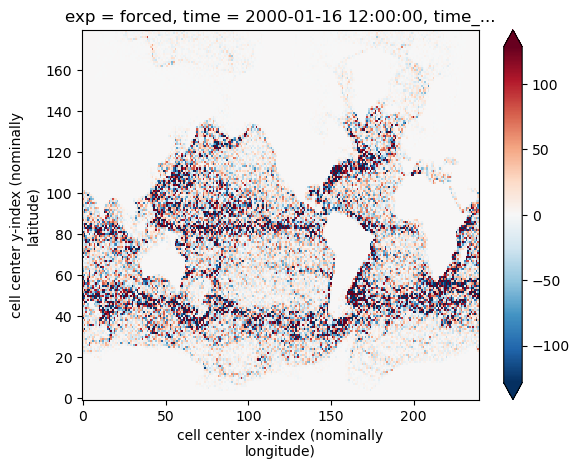

In [13]:
(
    conv_umo_coarse.isel(exp=0).sum("z_l") -
    (ds_coarse.dynamics_h_tendency*ds_coarse.areacello*1035).isel(exp=0).sum("z_l")
).plot(robust=True)

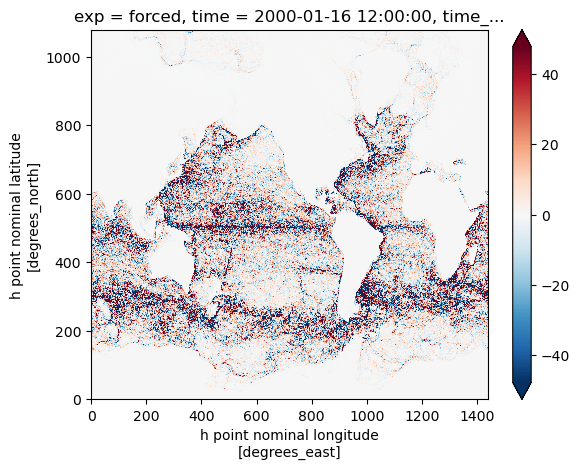

In [14]:
(
    conv_umo.isel(exp=0).sum("z_l") -
    (ds.dynamics_h_tendency*ds.areacello*1035).isel(exp=0).sum("z_l")
).plot(robust=True)

In [15]:
import regionate as reg
import sectionate as sec
name = "Baltic"
lons = np.array([13, 10, 9.0, 10., 12, 20.,  29., 24.5, 23.5, 22.5, 17.5])
lats = np.array([58, 57.5, 56, 54, 53.5, 53.5, 54.5,  59.,  61.,  63., 64.5])
region = reg.GriddedRegion(name, lons, lats, grid)
region_coarse = reg.GriddedRegion(name, lons, lats, grid_coarse)

In [16]:
VOLINT = (ds_coarse.dynamics_h_tendency*ds_coarse.areacello*1035).where(region_coarse.mask).sum(['xh', 'yh', 'z_l']) # LHS
SURINT = sec.convergent_transport(grid_coarse, region_coarse.i, region_coarse.j, layer="z_l", interface="z_i")['conv_mass_transport'].sum(["sect", "z_l"]) # RHS

In [17]:
VOLINT.isel(exp=0).values, SURINT.isel(exp=0).values

(array(-45942791.58880935), array(-45942785.66308594))

### Sigma2

In [18]:
ds_sigma2 = xr.open_dataset("../data/transformed_CM4Xp25_single_month.nc")

In [19]:
ds_sigma2 = ds_sigma2.drop_dims("time_bounds")
ds_sigma2 = ds_sigma2.drop_vars([v for v in ds_sigma2.data_vars if v not in ["umo", "vmo", "dynamics_h_tendency"]]).fillna(0.)

In [20]:
coords={
    'X': {'center': 'xh',  'outer': 'xq'},
    'Y': {'center': 'yh',  'outer': 'yq'},
    'Z': {'center': 'sigma2_l', 'outer': 'sigma2_i'},
}
metrics = {
    ('X', 'Y'): ['areacello']
}
grid_sigma2 = xgcm.Grid(
    ds_sigma2,
    coords=coords,
    metrics=metrics,
    boundary={"X":"periodic", "Y":"extend", "Z":"extend"},
    autoparse_metadata=False
)

In [21]:
region_sigma2 = reg.GriddedRegion(name, lons, lats, grid_sigma2)

In [22]:
VOLINT = (ds_sigma2.dynamics_h_tendency*ds_sigma2.areacello*1035).where(region_sigma2.mask).sum(['xh', 'yh', 'sigma2_l']) # LHS
SURINT = sec.convergent_transport(grid_sigma2, region_sigma2.i, region_sigma2.j, layer="sigma2_l", interface="sigma2_i")['conv_mass_transport'].sum(["sect", "sigma2_l"]) # RHS

In [23]:
VOLINT.values, SURINT.values

(array(-7171954.56659031), array(-7439915.37109375))

In [24]:
umo = grid._ds["umo"].isel(exp=0)
vmo = grid._ds["vmo"].isel(exp=0)

sigma2 = grid._ds["sigma2"].isel(exp=0)
sigma2 = sigma2.where(sigma2!=0)
sigma2_mod = sigma2.copy()

In [25]:
def itp_tracer_to_transports(grid, tracer, transport_X, transport_Y):
    xc = grid.axes['X'].coords['center']
    xo = grid.axes['X'].coords['outer']
    tracer_right = tracer.rename({xc:xo}).assign_coords({xo:transport_X[xo][1:]})
    tracer_right = xr.where(
        np.logical_and(~np.isnan(tracer_right.roll({xo:-1})), ~np.isnan(tracer_right)),
        0.5*sum([tracer_right.roll({xo:-1}), tracer_right]),
        0.
    )
    tracer_X = xr.concat([
        tracer_right.isel({xo:[-1]}).assign_coords(
            {xo:xr.DataArray(transport_X[xo][[0]], dims=(xo,))}
        ),
        tracer_right
    ], dim=xo).assign_coords(transport_X.coords)

    yc = grid.axes['Y'].coords['center']
    yo = grid.axes['Y'].coords['outer']
    tracer_right = tracer.rename({yc:yo}).assign_coords({yo:transport_Y[yo][1:]})
    tracer_right = xr.where(
        np.logical_and(~np.isnan(tracer_right.roll({yo:-1})), ~np.isnan(tracer_right)),
        0.5*sum([tracer_right.roll({yo:-1}), tracer_right]),
        0.
    )
    tracer_Y = xr.concat([
        tracer_right.isel({yo:[-1]}).assign_coords(
            {yo:xr.DataArray(transport_Y[yo][[0]], dims=(yo,))}
        ),
        tracer_right
    ], dim=yo).assign_coords(transport_Y.coords)

    return tracer_X, tracer_Y

In [ ]:
def fillna_below(grid, da):
    
    # First last non-NaN vertical index
    da = da.where(da!=0)
    idx = np.isnan(da).argmax()
    idx = xr.where(idx>0, idx-1, idx).compute()

    # Use bottom-most valid point to overwrite NaN points below
    zc = grid.axes['Z'].coords['center']
    return xr.where(
        ds[zc] > ds[zc].isel({zc:idx}),
        da.isel({zc:idx}),
        da
    )

In [28]:
sigma2_X, sigma2_Y = itp_tracer_to_transports(grid, sigma2, umo, vmo)
sigma2_X_filled = fillna_below(grid, sigma2_X)
sigma2_Y_filled = fillna_below(grid, sigma2_Y)

In [32]:
sigma2_XZ = grid.interp(sigma2_X_filled, "Z", boundary="extend")

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [33]:
umo_sigma2 = grid.transform(
    umo.fillna(0.),
    "Z",
    target = np.array([-1000, 1000]),
    target_data = sigma2_XZ,
    method="conservative"
)

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:381: UserWarning: Input`target_data` has no name, but we need a name for the transformed dimension. The name `TRANSFORMED_DIMENSION` will be used. To avoid this warning, call `.rename` on `target_data` before calling `transform`.
  warnings.warn(
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:245: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


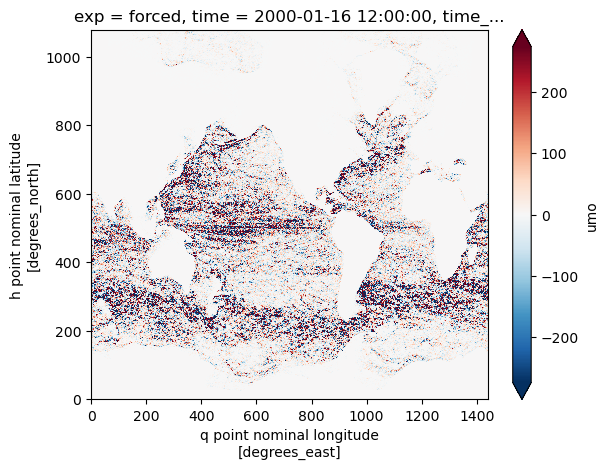

In [34]:
(umo.sum("z_l") - umo_sigma2.squeeze()).squeeze().plot(robust=True)